# <u><center><img src="https://www.asterhospitals.in/sites/default/files/styles/optimize_images/public/2023-07/childhood-cancer.jpg.webp?itok=LP3CbtmO" height='50%' width='50%' alt="alternative text"></center>UNVEILING GLOBAL CANCER TRENDS: AN EXPLORATORY DATA ANALYSIS</u>

### Project Overview: 
This project aims to uncover insights into the global cancer landscape by analyzing patient data from diverse regions 
and demographics. Through exploratory data analysis, we seek to identify patterns, trends, and correlations that can inform cancer research, 
healthcare policy, and treatment strategies.


#### IMPORTING NECESSARY LIBRARIES AND READING IN THE CSV FILE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
scaler = MinMaxScaler()
pd.set_option('display.max_columns', 500)
df = pd.read_csv('global_cancer_patient.csv').drop('Patient_ID', axis=1)
df = df.sample(frac=0.2, random_state=2017).reset_index(drop=True)
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,76,Other,Brazil,2015,1.6,6.5,3.9,8.9,3.6,Liver,Stage I,35166.95,0.8,5.32
1,43,Male,Germany,2019,3.6,6.2,0.3,7.2,1.7,Cervical,Stage IV,22068.46,7.9,4.86
2,36,Female,India,2018,7.2,6.3,4.1,8.1,6.3,Liver,Stage I,84520.02,5.7,5.56
3,24,Female,Pakistan,2016,9.6,8.1,3.1,3.5,7.8,Breast,Stage I,88218.35,0.2,5.32
4,65,Female,USA,2016,6.6,3.3,1.4,4.4,5.5,Cervical,Stage IV,56346.61,9.6,4.33


DATA CLEANING

In [3]:
# check for misssing data
for column in df.columns:
    if df[column].isna().sum() == 0:
        print(df[column].isna().sum(), "missing Data in ", column)

0 missing Data in  Age
0 missing Data in  Gender
0 missing Data in  Country_Region
0 missing Data in  Year
0 missing Data in  Genetic_Risk
0 missing Data in  Air_Pollution
0 missing Data in  Alcohol_Use
0 missing Data in  Smoking
0 missing Data in  Obesity_Level
0 missing Data in  Cancer_Type
0 missing Data in  Cancer_Stage
0 missing Data in  Treatment_Cost_USD
0 missing Data in  Survival_Years
0 missing Data in  Target_Severity_Score


In [4]:
# ENCODING CATEGORICAL COLUMNS
df['Gender'] = (df['Gender'] == "Male").astype(int) # One Hot_Encoding for Gender
df = pd.get_dummies(df, columns=['Cancer_Type'], drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Cancer_Stage'] = le.fit_transform(df['Cancer_Stage'])

df_cancer_cols = ['Cancer_Type_Cervical', 'Cancer_Type_Colon', 'Cancer_Type_Leukemia',
       'Cancer_Type_Liver', 'Cancer_Type_Lung', 'Cancer_Type_Prostate',
       'Cancer_Type_Skin']

df[df_cancer_cols] = (df[df_cancer_cols]).astype(int)

In [6]:
# selectimg only columns with bumerical values
num_df = df.select_dtypes(include='number')

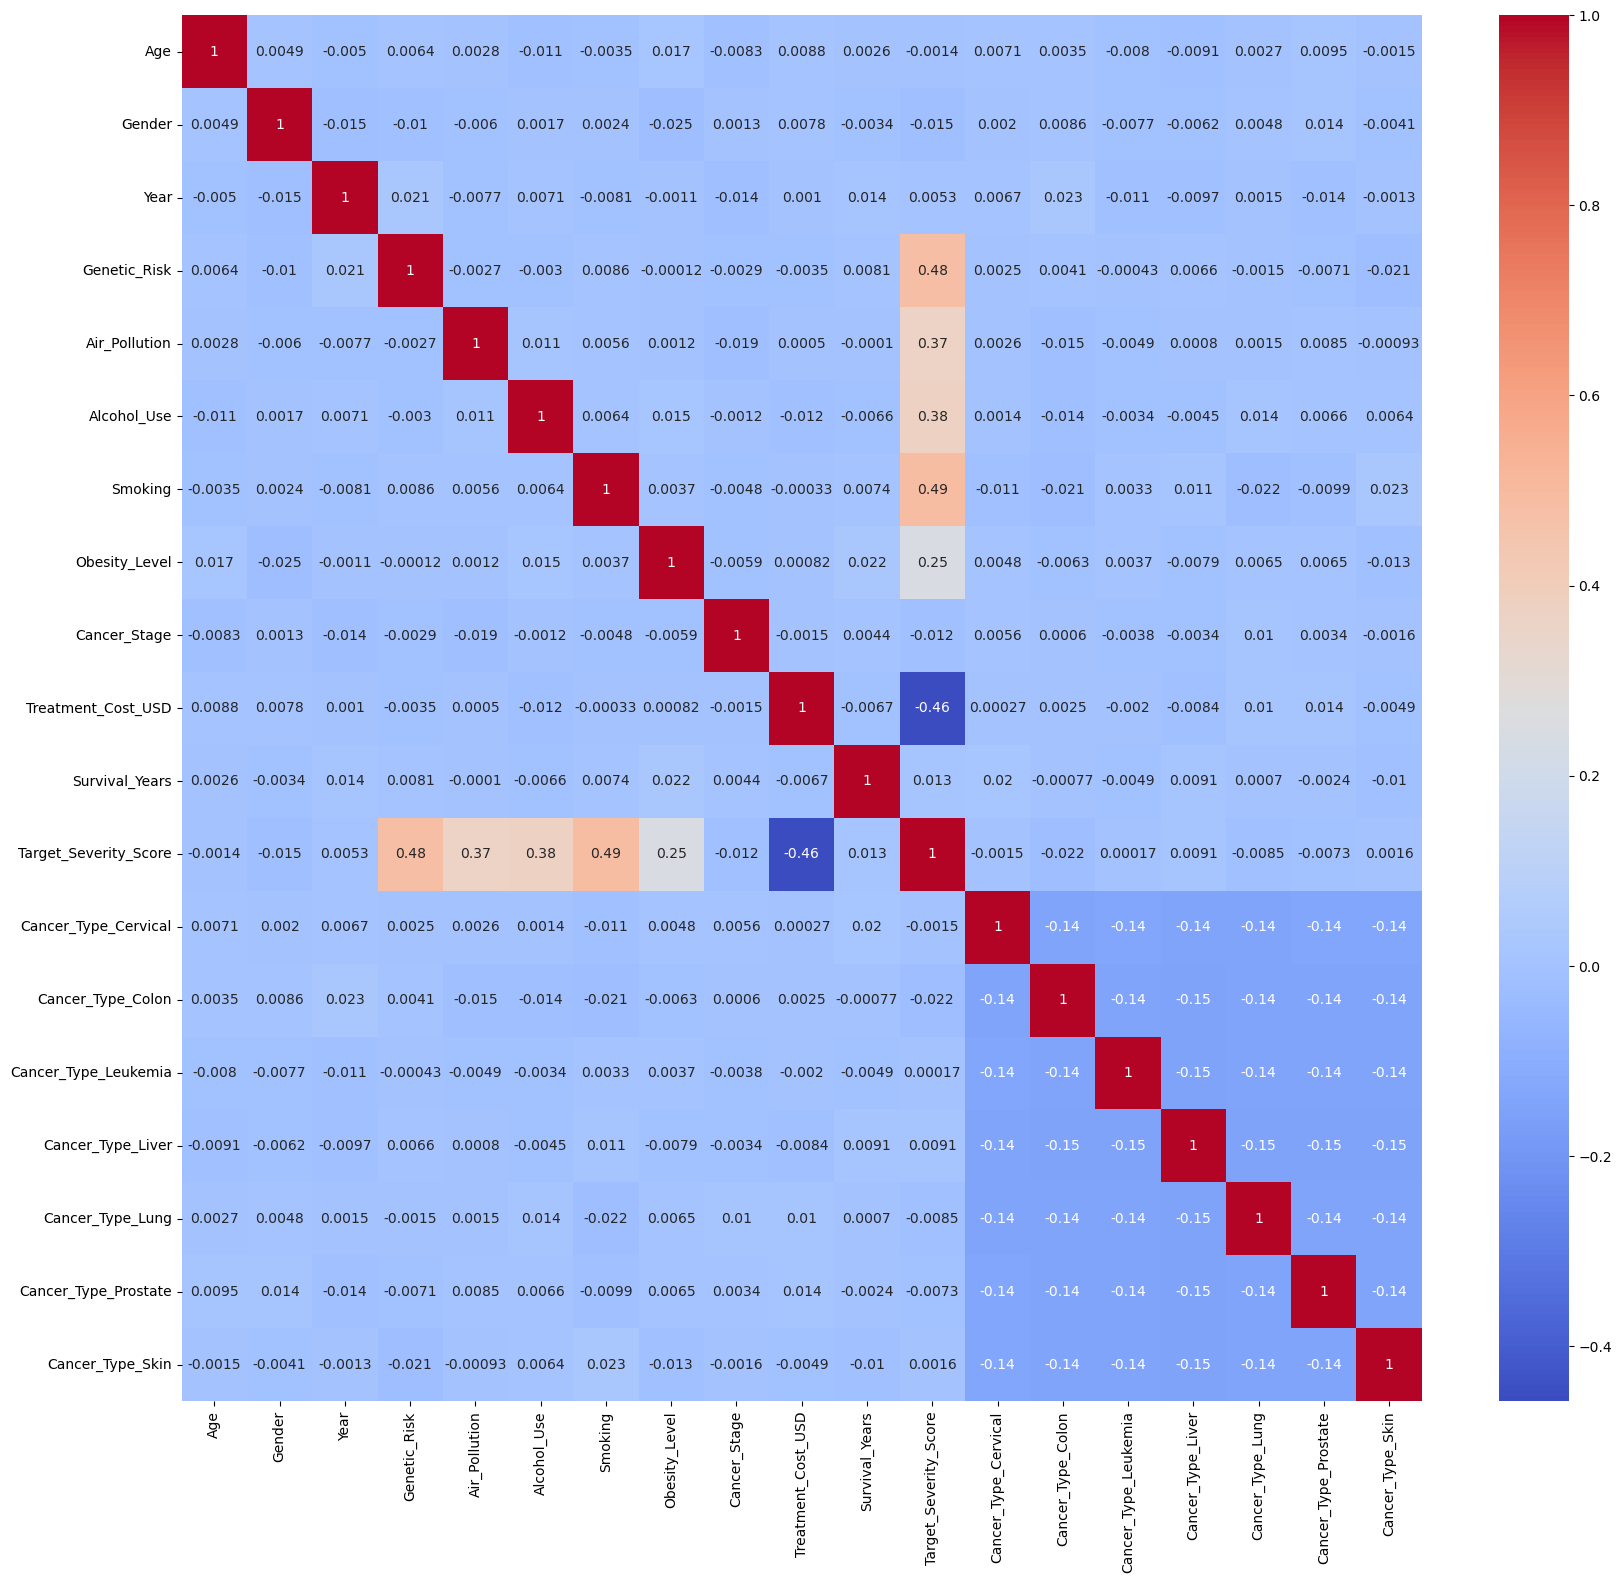

In [7]:
# plotting to determine multicolinearity between variables
corr = num_df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

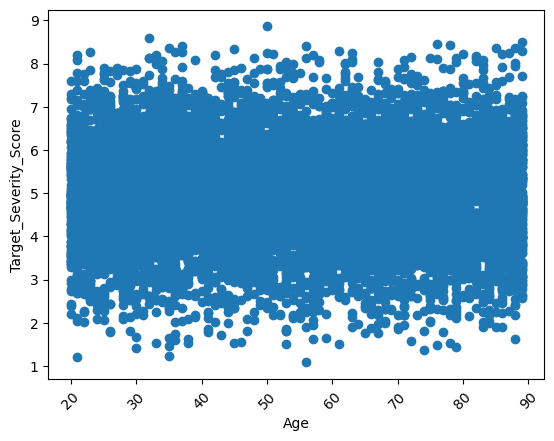

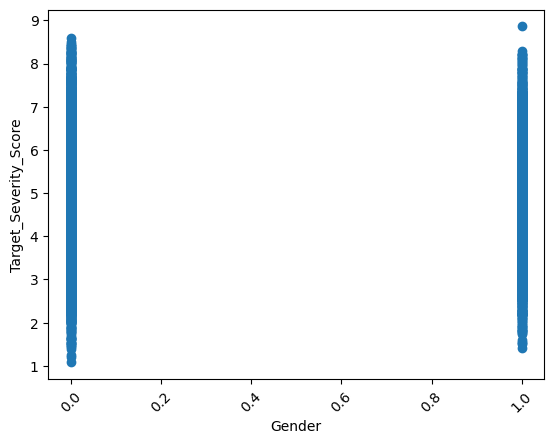

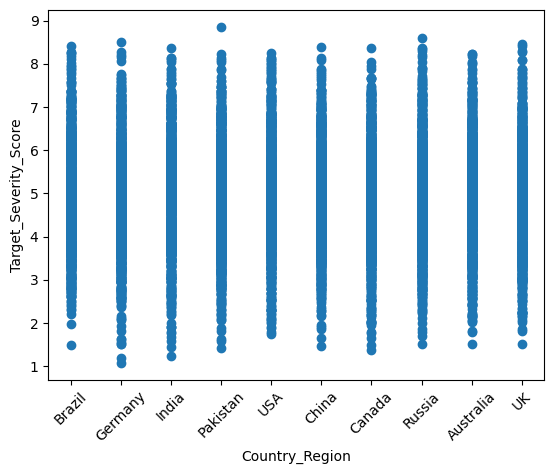

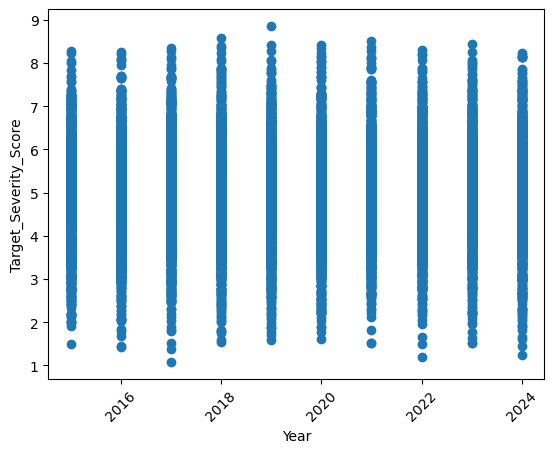

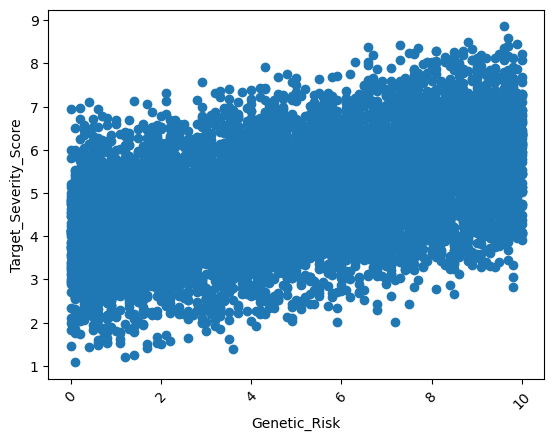

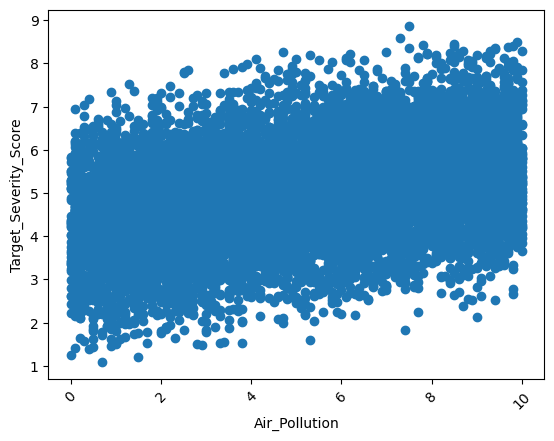

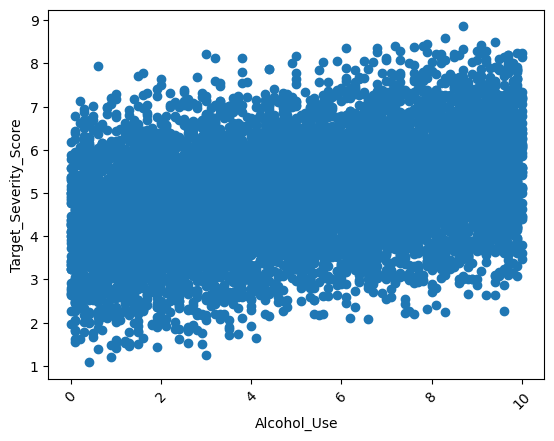

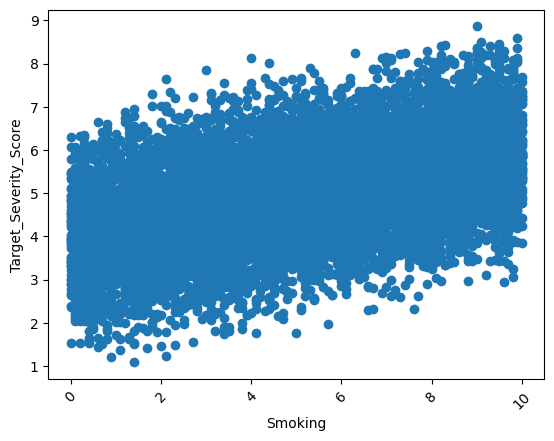

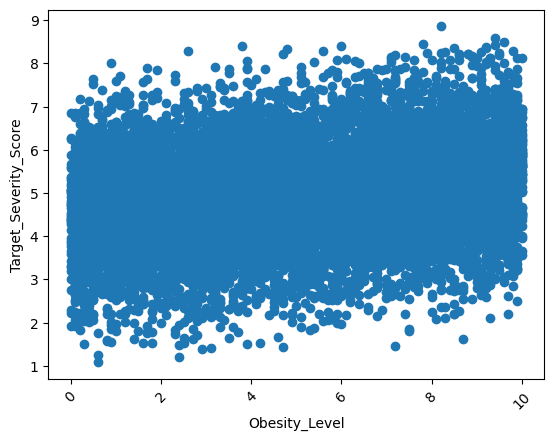

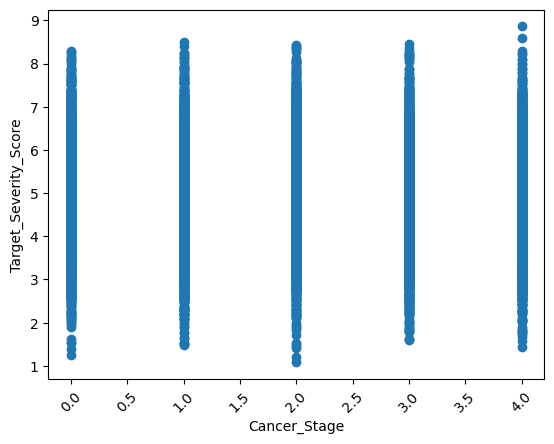

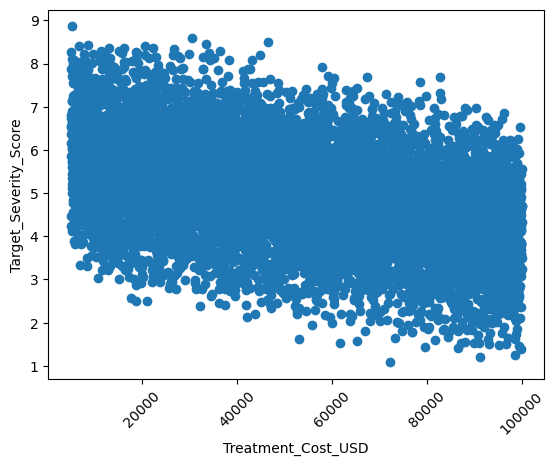

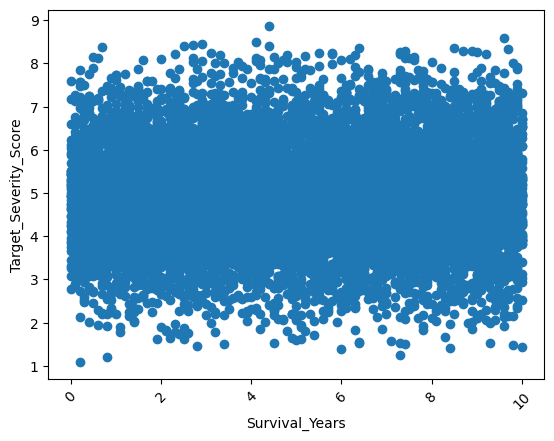

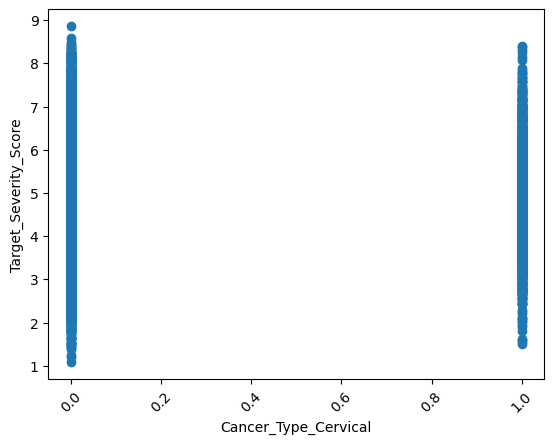

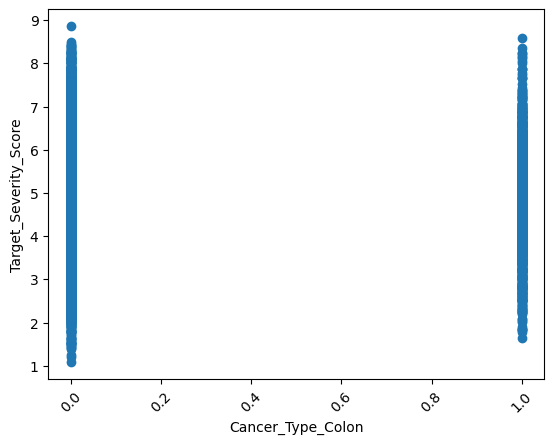

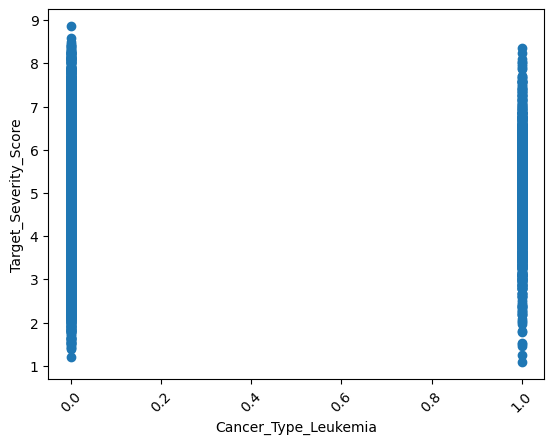

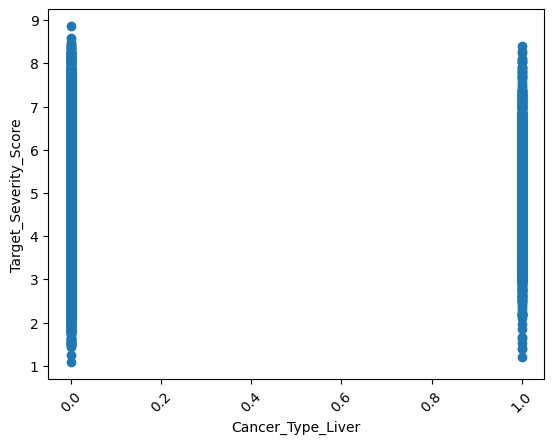

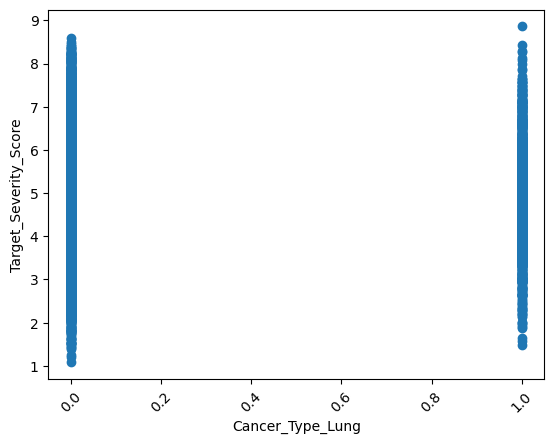

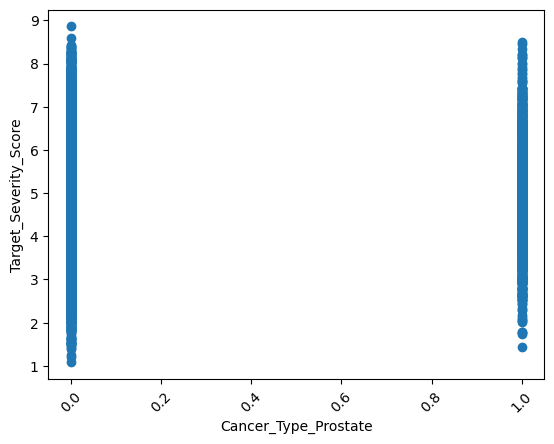

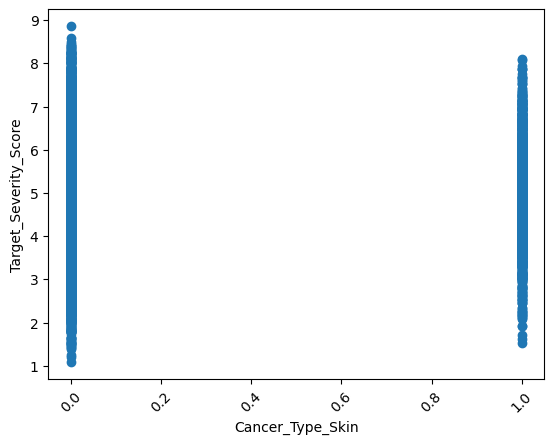

In [8]:
# plotting every other columns against Target_Severity_Score
for column in df.columns:
    if column != 'Target_Severity_Score':
        plt.scatter(df[column], df['Target_Severity_Score'])
        plt.xticks(rotation=45)
        plt.xlabel(column)
        plt.ylabel('Target_Severity_Score')
        #plt.title(column, 'vs', 'Target_Severity_Score')
        plt.show()

# - How does Genetic Risk, Air pollution, Alcohol use, Smoking and obesity level affect Target_Severity_Score

In [9]:
df_gaaso = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Target_Severity_Score']
gaaso = df[df_gaaso]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

gaaso_x = gaaso.drop('Target_Severity_Score', axis=1)
gaaso_y = gaaso['Target_Severity_Score']

g_x_train, g_x_test, g_y_train, g_y_test = train_test_split(gaaso_x, gaaso_y, test_size=0.2, random_state=2017)

g_x_train = scaler.fit_transform(g_x_train)
g_x_test = scaler.transform(g_x_test)

import statsmodels.api as sm
g_x_train = sm.add_constant(g_x_train)
g_x_test = sm.add_constant(g_x_test)
lr_gaaso = sm.OLS(g_y_train,g_x_train).fit()
g_y_pred = lr_gaaso.predict(g_x_test)
print(lr_gaaso.summary())
g_r2 = r2_score(g_y_test, g_y_pred)
print('gaaso R_squared Results: ', g_r2)

                              OLS Regression Results                             
Dep. Variable:     Target_Severity_Score   R-squared:                       0.794
Model:                               OLS   Adj. R-squared:                  0.794
Method:                    Least Squares   F-statistic:                     6175.
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                           09:23:59   Log-Likelihood:                -6486.9
No. Observations:                   8000   AIC:                         1.299e+04
Df Residuals:                       7994   BIC:                         1.303e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9519 

# COEFFICIENT OF VARIABLES
### The results shows that a unit increase in Genetic Risk will lead to a 0.2017 increase in Target Severity Score. the same can  be said for the  rest of the variables.

# SIGNIFICANCE LEVEL
### H0: There is no significant relationship between variables and the target
### H1: There exists a significant relationship between variables and the target
### The p value of each of this variables is 0.000 which is less than 0.05 significant level so we can reject H0 and accept H1


### CHECkING FOR MULTICOLINEARITY BETWEEN VARIABLES USED IN THE REGRESSION ABOVE

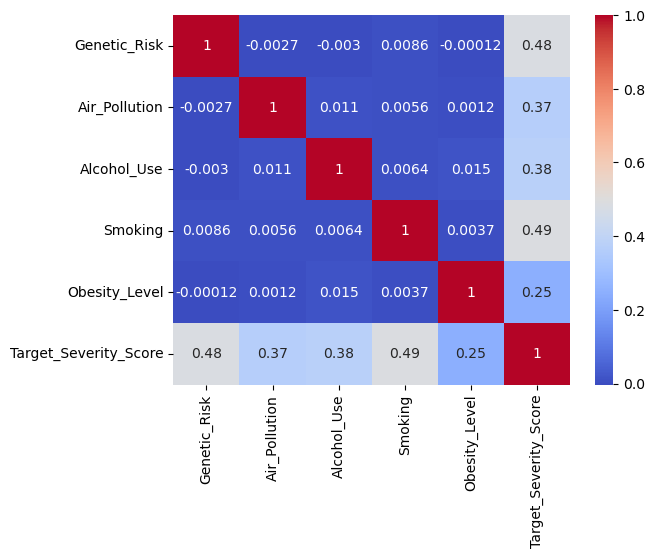

In [10]:
corr_gaaso = gaaso.corr()
sns.heatmap(data=corr_gaaso, annot=True, cmap='coolwarm')
plt.show()

### Results shows that there exists no multicolinearity between the variables

# - LOGISTIC REGRESSION TO  DETERMINE HOW THESE VARIABLES (Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking, Obesity_Level) AFFECTS CANCER STAGE

In [12]:
df_gaast = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Stage']
gaast = df[df_gaast]
gaast_x = gaast.drop('Cancer_Stage', axis=1)
gaast_y = gaast['Cancer_Stage']

t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(gaast_x, gaast_y, test_size=0.2, random_state=2017)

from sklearn.metrics import classification_report
t_x_train = sm.add_constant(t_x_train)
t_x_test = sm.add_constant(t_x_test)
lg_gaast = sm.MNLogit(t_y_train,t_x_train).fit(method='bfgs', maxiter=1000)
t_y_pred = lg_gaast.predict(t_x_test)
t_y_pred_class = t_y_pred.idxmax(axis=1)
print(lg_gaast.summary())
print(classification_report(t_y_test, t_y_pred_class))

Optimization terminated successfully.
         Current function value: 1.607941
         Iterations: 38
         Function evaluations: 42
         Gradient evaluations: 42
                          MNLogit Regression Results                          
Dep. Variable:           Cancer_Stage   No. Observations:                 8000
Model:                        MNLogit   Df Residuals:                     7976
Method:                           MLE   Df Model:                           20
Date:                Tue, 08 Jul 2025   Pseudo R-squ.:               0.0006265
Time:                        09:28:23   Log-Likelihood:                -12864.
converged:                       True   LL-Null:                       -12872.
Covariance Type:            nonrobust   LLR p-value:                    0.7087
Cancer_Stage=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2750     

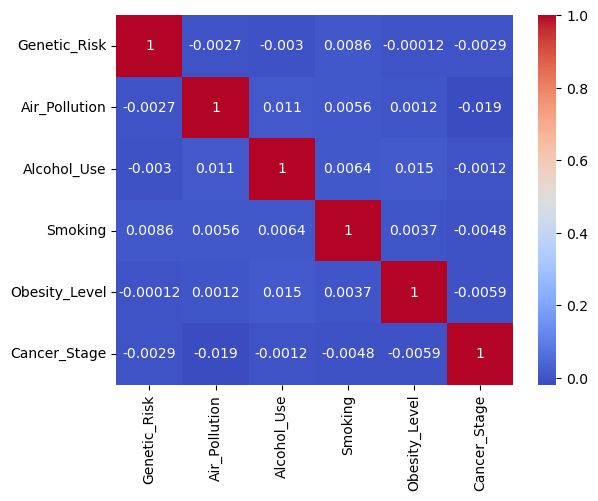

In [14]:
# Plotting to check for multicolinearity between variables used in the above logistic regression
corr_gaast = gaast.corr()
sns.heatmap(data=corr_gaast, annot=True, cmap='coolwarm')
plt.show()

## - CHECKING FOR MODEL PERFORMANCE ACROSS MODELS

In [16]:
num_cols = ['Age', 'Gender', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Survival_Years',
       'Cancer_Type_Cervical', 'Cancer_Type_Colon',
       'Cancer_Type_Leukemia', 'Cancer_Type_Liver', 'Cancer_Type_Lung',
       'Cancer_Type_Prostate', 'Cancer_Type_Skin']

In [17]:
# SCaler down some of the dependent variables to 0 and 1

x = num_df[num_cols]
y = num_df['Target_Severity_Score']

x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2017)

Linear Regression

In [18]:
# Linear Regression of the extracted data

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)
lr_y_pred = model.predict(x_test)

# test performance of the Linear Regressionn model
lr_r2 = r2_score(y_test, lr_y_pred)
print('R_Squared for Linear Regression is: ', lr_r2)

print(f"Intercept (B0): {model.intercept_}")
print(f"Slope (B1) or coefficients for features: {model.coef_}")

R_Squared for Linear Regression is:  0.7990150776996642
Intercept (B0): 4.955557415521705
Slope (B1) or coefficients for features: [-8.06893414e-03 -4.45506371e-03 -2.96300643e-03  5.80764228e-01
  4.33901665e-01  4.44017464e-01  5.75451976e-01  2.88067900e-01
  3.06162206e-03 -5.39670029e-03 -7.86775103e-03 -5.43085077e-04
 -1.10943447e-03 -9.77398586e-03 -1.38582155e-02  1.06644571e-03]


0.7990150776996642 R_squared of Linear Regression shows that Linear Regression model is performing moderately well in predictions.

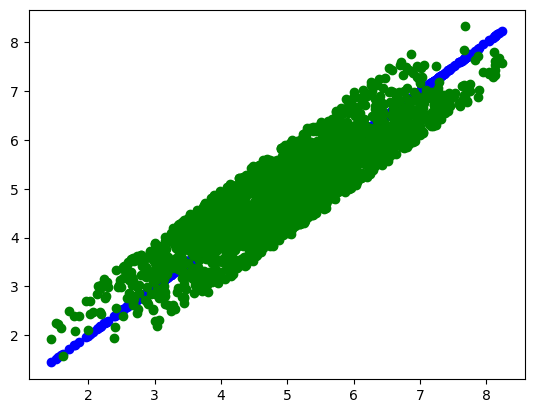

In [19]:
# plotting the y true values against the predicted values
lr_d = pd.DataFrame({'actual' : y_test, 'predicted' : lr_y_pred})
plt.scatter(x=lr_d['actual'], y=lr_d['actual'], color='Blue')
plt.scatter(x=lr_d['actual'], y=lr_d['predicted'], color='Green')
plt.show()

RandomForest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=2017)
rfr_model = rfr.fit(x_train, y_train)
rfr_y_pred = model.predict(x_test)

# test performance of random forest regressor
rfr_r2 = r2_score(y_test, rfr_y_pred)
print('random forest regressor R_Squared is: ', rfr_r2)

random forest regressor R_Squared is:  0.7990150776996642


Random forest value of 0.7990150776996642 shows that this model is also performing moderately well in predicting the test target variables.

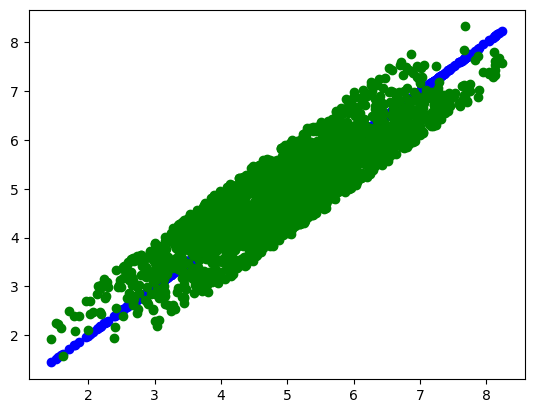

In [21]:
# plotting the result of the randomforest regressor
rfr_d = pd.DataFrame({'actual' : y_test, 'rfr_predicted' : rfr_y_pred})
plt.scatter(x=rfr_d['actual'], y=rfr_d['actual'], color='Blue')
plt.scatter(x=rfr_d['actual'], y=rfr_d['rfr_predicted'], color='green')
plt.show()

Support Vector Machine

In [22]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=0.1, gamma='auto')
svr_model = svr.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_r2 = r2_score(y_test, svr_y_pred)
print('SVR is: ', svr_r2)

SVR is:  0.7984380707989012


the results shows that the suppporrt vector regressor is 
performing well in making predictions on the target variable but not as wellas the previous two models.

KNearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')
knn_model = knn.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_r2 = r2_score(y_test, knn_y_pred)
print('knn is: ', knn_r2)

knn is:  0.6452261376435565


the results shows that the knearest neighbors regressor is 
performing well in making predictions on the target variable but not as well as the previous three models.

Model performance shows Linear Regression as the best performing model with the value of 0.7990150776996642, 
and closely followed by GradientBoosting Regressor with the value of 0.7905944518662705.

# - UNSUPERVISED ML OF CORE VARIABLES(Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking, Obesity_Level) AGAINST TARGET SEVRITY SCORE

In [29]:
# KMEANS
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
g_x_train_pca = pca.fit_transform(g_x_train)
g_x_test_pca = pca.transform(g_x_test)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(g_x_train_pca)

# Cluster labels for training and test data
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(g_x_test_pca)

# Combine data with cluster labels
x_cluster_train = np.hstack((g_x_train_pca, train_cluster_labels.reshape(-1, 1)))
x_cluster_test = np.hstack((g_x_test_pca, test_cluster_labels.reshape(-1, 1)))

# Create DataFrame with cluster labels
df_cluster_test = pd.DataFrame(g_x_test, columns=['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Target_Severity_Score'])
df_cluster_test['cluster'] = test_cluster_labels


df_cluster_test


,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Target_Severity_Score,cluster
0,1.0,1.678525,-1.688829,0.265818,-1.467337,0.170666,1
1,1.0,1.261674,0.272135,1.686006,-1.397732,-0.975442,0
2,1.0,0.810085,1.097805,0.196540,0.446804,0.934738,0
3,1.0,-1.517334,0.100121,1.131786,-1.397732,-1.531131,0
4,1.0,-0.475206,-0.794354,-1.223648,1.247263,0.656894,2
...,...,...,...,...,...,...,...
1995,1.0,0.011120,0.960193,0.854676,0.760027,-0.732328,0
1996,1.0,0.983773,-1.344800,-0.600151,-1.676153,-0.523945,2
1997,1.0,-0.475206,-0.863160,-1.466120,0.760027,-0.836520,2
1998,1.0,-1.517334,-1.620023,0.750760,-0.388458,1.073660,1


In [30]:
# checking the performance of  the Kmeans Results

from sklearn.metrics import silhouette_score

kmeans_s_score = silhouette_score(g_x_test_pca, test_cluster_labels)
print('KMEANS SILHOUETTE SCORE: ',kmeans_s_score)

KMEANS SILHOUETTE SCORE:  0.34002709457697955


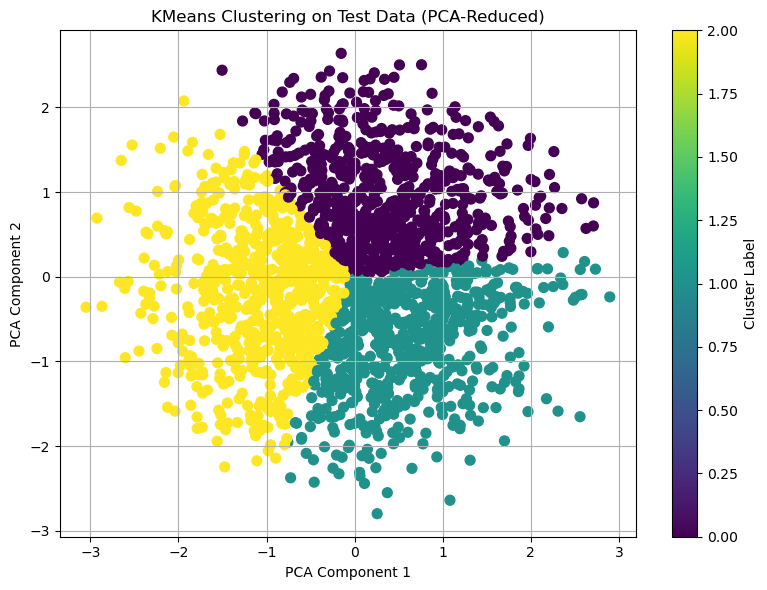

In [31]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(g_x_test_pca[:, 0], g_x_test_pca[:, 1], c=test_cluster_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering on Test Data (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# Create a DataFrame with cluster labels
df_cluster_train = pd.DataFrame(g_x_train, columns=['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Target_Severity_Score'])
df_cluster_train['cluster'] = train_cluster_labels
df_cluster_train['Target_Severity_Score'] = gaaso.loc[df_cluster_train.index, 'Target_Severity_Score']

# Calculate the average Target_Severity_Score for each cluster
cluster_avg_severity = df_cluster_train.groupby('cluster')['Target_Severity_Score'].mean()
print(cluster_avg_severity)

print("Interpretation of Cluster 0 based on centroids:")
print(df_cluster_test.groupby('cluster')[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].mean().loc[0])

cluster
0    5.005043
1    4.962117
2    4.914869
Name: Target_Severity_Score, dtype: float64
Interpretation of Cluster 0 based on centroids:
Genetic_Risk     1.000000
Air_Pollution   -0.115337
Alcohol_Use      0.749702
Smoking          0.542067
Obesity_Level    0.450213
Name: 0, dtype: float64


## Considering these characteristics, Cluster 0 seems to represent individuals with:

- High genetic risk (1.00000)
- Moderate to high levels of substance use (alcohol and smoking) - (0.749702, 0.542067)
- Moderate levels of obesity - (0.450213)
- Relatively lower exposure to air pollution - (-0.115337)

The average target severity score for Cluster 0 is 5.005043, which is the highest among the three clusters. This suggests that 
Individuals in Cluster 0 may be at a higher risk of severe health outcomes due to their genetic risk and lifestyle factors.

In [37]:

print("Interpretation of Cluster 1 based on centroids:")
print(df_cluster_test.groupby('cluster')[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].mean().loc[1])

Interpretation of Cluster 1 based on centroids:
Genetic_Risk     1.000000
Air_Pollution   -0.116410
Alcohol_Use     -0.381888
Smoking          0.158830
Obesity_Level   -0.658257
Name: 1, dtype: float64


## Considering these characteristics, Cluster 1 seems to represent individuals with:

- High genetic risk (1.00000)
- low to moderate levels of substance use (alcohol and smoking) - (-0.381888, 0.158830)
- Moderate levels of obesity - (0.450213)
- Relatively lower exposure to air pollution - (-0.658257)

The average target severity score for Cluster 1 is 4.962117, which is moderate among the three clusters. This suggests that 
Individuals in Cluster 1 may be at a moderate risk of severe health outcomes due to their genetic risk and lifestyle factors.

In [38]:
print('Intepretation od Cluster 2 based on Centriods:')
print(df_cluster_test.groupby('cluster')[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']].mean().loc[2])

Intepretation od Cluster 2 based on Centriods:
Genetic_Risk     1.000000
Air_Pollution    0.362484
Alcohol_Use     -0.362863
Smoking         -0.713904
Obesity_Level    0.163021
Name: 2, dtype: float64


### Considering these characteristics, Cluster 2 seems to represent individuals with:

- High genetic risk (1.00000)
- Moderate to high levels of less substance use or consumption (alcohol and smoking) - (-0.362863, -0.713904)
- Moderately lower levels of obesity - (-0.713904)
- Moderate exposure to air pollution - (0.362484)

The average target severity score for Cluster 2 is 4.914869, which is lower than the rest of the three clusters. This suggests that 
Individuals in Cluster 2 may be at a lower risk of severe health outcomes due to their genetic risk and lifestyle factors.

# - CLUSTER ANALYSIS OF CORE VARIABLES AGAINST TREATMENT COST USD

In [39]:
# DataFrame being used here
num_df.head()

,Age,Gender,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,76,0,2015,1.6,6.5,3.9,8.9,3.6,1,35166.95,0.8,5.32,0,0,0,1,0,0,0
1,43,1,2019,3.6,6.2,0.3,7.2,1.7,4,22068.46,7.9,4.86,1,0,0,0,0,0,0
2,36,0,2018,7.2,6.3,4.1,8.1,6.3,1,84520.02,5.7,5.56,0,0,0,1,0,0,0
3,24,0,2016,9.6,8.1,3.1,3.5,7.8,1,88218.35,0.2,5.32,0,0,0,0,0,0,0
4,65,0,2016,6.6,3.3,1.4,4.4,5.5,4,56346.61,9.6,4.33,1,0,0,0,0,0,0


In [41]:
# setting up the x and y values
n_x = num_df.drop(['Gender', 'Target_Severity_Score'], axis=1)
n_y = num_df['Treatment_Cost_USD']

# dividing the data into train and test classes
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(n_x, n_y, test_size=0.2, random_state=42)

# Dimensionality reduction of the train and test values to improve the model performance
x_n_train_pca = pca.fit_transform(x_n_train)
x_n_test_pca = pca.transform(x_n_test)

# Fitting the data into the Kmeans Model
n_kmeans = kmeans.fit(x_n_train_pca)

# cluster labels for train and test data
n_train_cluster_labels = n_kmeans.labels_
n_test_cluster_labels = n_kmeans.predict(x_n_test_pca)

# Stack Cluster together with data
x_n_cluster_train = np.hstack((x_n_train_pca, n_train_cluster_labels.reshape(-1, 1)))
x_n_cluster_test = np.hstack((x_n_test_pca, n_test_cluster_labels.reshape(-1, 1)))

# create a data frame for x test
n_cluster_test = pd.DataFrame(x_n_test, columns=['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Stage',	'Treatment_Cost_USD', 'Survival_Years',  'Cancer_Type_Cervical', 'Cancer_Type_Colon',	'Cancer_Type_Leukemia',	'Cancer_Type_Liver',	'Cancer_Type_Lung',	'Cancer_Type_Prostate',	'Cancer_Type_Skin'])
n_cluster_test['cluster'] = n_test_cluster_labels

n_cluster_test

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin,cluster
6252,50,2017,5.0,4.8,5.0,1.2,5.5,1,66820.29,5.7,0,1,0,0,0,0,0,0
4684,83,2015,8.7,5.1,7.1,1.5,9.5,2,49562.07,3.0,0,0,0,0,0,1,0,0
1731,81,2021,7.1,9.5,2.6,2.2,4.5,1,63788.50,2.9,0,0,0,1,0,0,0,0
4742,36,2023,4.3,4.0,2.5,1.4,0.0,2,22914.27,0.0,0,0,0,0,1,0,0,1
4521,82,2020,3.7,9.8,0.2,2.2,2.5,1,22346.99,6.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,51,2017,7.5,7.6,3.7,5.7,0.5,3,62955.95,8.8,1,0,0,0,0,0,0,0
8285,72,2023,3.1,9.8,7.6,4.5,6.9,1,29900.42,3.5,0,0,0,0,0,0,1,1
7853,59,2020,8.1,8.2,9.7,5.0,0.1,0,92344.75,4.5,0,1,0,0,0,0,0,2
1095,85,2024,7.7,6.0,4.5,1.7,4.0,0,45847.93,0.9,0,1,0,0,0,0,0,0


In [42]:
# checking for the performance of the kmeans cluster model
n_kmeans_score = silhouette_score(x_n_test_pca, n_test_cluster_labels)
print(f"Kmeans score: , {n_kmeans_score}")

Kmeans score: , 0.5890421359084661


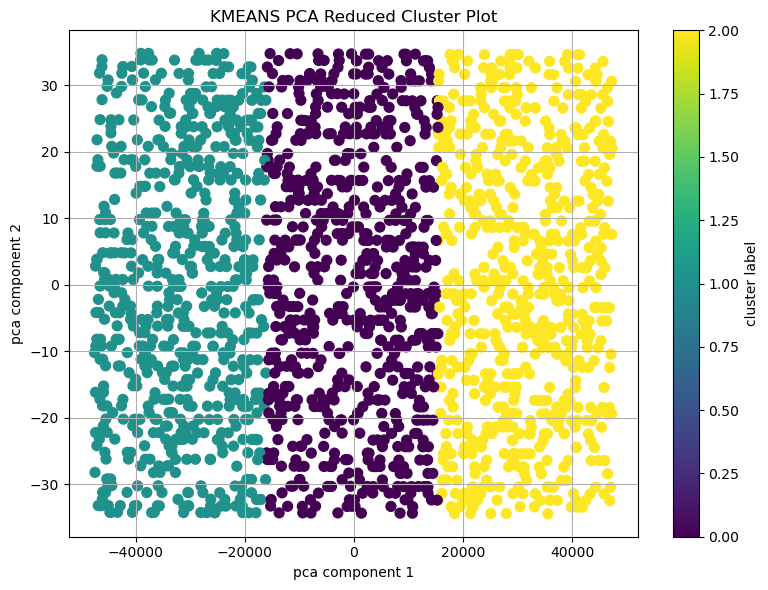

In [43]:
# plotting the kmeans cluster pca reduced results
plt.figure(figsize=(8, 6))
n_scatter = plt.scatter(x_n_test_pca[:, 0], x_n_test_pca[:, 1], c=n_test_cluster_labels, cmap='viridis', s=50)
plt.title('KMEANS PCA Reduced Cluster Plot')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.colorbar(n_scatter, label='cluster label')
plt.grid()
plt.tight_layout()
plt.show()

## - Identifying independent variables clusters in relation to the target variable (Target severity score) 

In [45]:
# Create a DataFrame with cluster labels
n_df_cluster_train = pd.DataFrame(x_n_train, columns=['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 
                                                      'Cancer_Stage',	'Treatment_Cost_USD', 'Survival_Years',  'Cancer_Type_Cervical', 
                                                      'Cancer_Type_Colon',	'Cancer_Type_Leukemia',	'Cancer_Type_Liver',	'Cancer_Type_Lung',	
                                                      'Cancer_Type_Prostate',	'Cancer_Type_Skin'])
n_df_cluster_train['n_train_cluster'] = n_train_cluster_labels
n_df_cluster_train['Treatment_Cost_USD'] = num_df.loc[n_df_cluster_train.index, 'Treatment_Cost_USD']

# Calculate the average Target_Severity_Score for each cluster
n_cluster_avg_severity = n_df_cluster_train.groupby('n_train_cluster')['Treatment_Cost_USD'].mean()
print(n_cluster_avg_severity)

print("Interpretation of Cluster 0 based on centroids:")
print(n_cluster_test.groupby('cluster')[['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 
                                         'Cancer_Stage',	'Treatment_Cost_USD', 'Survival_Years',  'Cancer_Type_Cervical', 'Cancer_Type_Colon',	
                                         'Cancer_Type_Leukemia',	'Cancer_Type_Liver',	'Cancer_Type_Lung',	'Cancer_Type_Prostate',	
                                         'Cancer_Type_Skin']].mean().loc[0])

n_train_cluster
0    52058.041898
1    20939.201599
2    83931.401783
Name: Treatment_Cost_USD, dtype: float64
Interpretation of Cluster 0 based on centroids:
Age                        54.752907
Year                     2019.370640
Genetic_Risk                4.966715
Air_Pollution               4.836773
Alcohol_Use                 5.214244
Smoking                     5.103198
Obesity_Level               5.007413
Cancer_Stage                1.979651
Treatment_Cost_USD      52552.387413
Survival_Years              4.987791
Cancer_Type_Cervical        0.119186
Cancer_Type_Colon           0.101744
Cancer_Type_Leukemia        0.139535
Cancer_Type_Liver           0.129360
Cancer_Type_Lung            0.122093
Cancer_Type_Prostate        0.135174
Cancer_Type_Skin            0.120640
Name: 0, dtype: float64


## the variables in relation to Treatment_Cost_USD for Cluster 0:

### Cluster 0 Characteristics:

- Age: Middle-aged to older adults (54.752907 years)
- Year: Around 2019
- Genetic Risk: High (4.966715)
- Air Pollution: High (4.836773)
- Alcohol Use: High (5.214244)
- Smoking: High (5.103198)
- Obesity Level: High (5.007413)
- Cancer Stage: Early to intermediate stage (1.979651)
- Cancer Type: Diverse, with slightly higher proportions of Leukemia (0.139535) and Prostate cancer (0.135174)

### Treatment Cost:

- The average Treatment_Cost_USD for Cluster 0 is $52,058.04, which is relatively high compared to Cluster 1 ($20,939.20) but lower than Cluster 2 ($83,931.40).

### Insights:

- Individuals in Cluster 0 tend to have high genetic risk, high exposure to air pollution, and unhealthy lifestyle habits (high alcohol use, smoking, and obesity levels).
- Despite having early to intermediate-stage cancer, the treatment costs for Cluster 0 are relatively high, which might be attributed to the aggressive nature of the disease, the presence of comorbidities, or the use of expensive treatments.
- The diverse cancer types in Cluster 0 might require different treatment approaches, contributing to the high treatment costs.

Overall, Cluster 0 represents a high-risk group with significant health challenges, resulting in substantial treatment costs.

In [46]:
print("Interpretation of Cluster 1 based on centroids:")
print(n_cluster_test.groupby('cluster')[['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 
                                         'Cancer_Stage',	'Treatment_Cost_USD', 'Survival_Years',  'Cancer_Type_Cervical', 'Cancer_Type_Colon',	
                                         'Cancer_Type_Leukemia',	'Cancer_Type_Liver',	'Cancer_Type_Lung',	'Cancer_Type_Prostate',	
                                         'Cancer_Type_Skin']].mean().loc[1])

Interpretation of Cluster 1 based on centroids:
Age                        53.387879
Year                     2019.451515
Genetic_Risk                4.937121
Air_Pollution               5.165758
Alcohol_Use                 5.100303
Smoking                     4.913333
Obesity_Level               5.072576
Cancer_Stage                1.957576
Treatment_Cost_USD      20792.215939
Survival_Years              4.908939
Cancer_Type_Cervical        0.115152
Cancer_Type_Colon           0.107576
Cancer_Type_Leukemia        0.143939
Cancer_Type_Liver           0.121212
Cancer_Type_Lung            0.121212
Cancer_Type_Prostate        0.122727
Cancer_Type_Skin            0.107576
Name: 1, dtype: float64


# Cluster 1 Characteristics:

- Age: Middle-aged (53.387879 years)
- Year: Around 2019
- Genetic Risk: High (4.937121)
- Air Pollution: Very high (5.165758)
- Alcohol Use: High (5.100303)
- Smoking: High (4.913333)
- Obesity Level: High (5.072576)
- Cancer Stage: Early to intermediate stage (1.957576)
- Cancer Type: Diverse, with slightly higher proportions of Leukemia (0.143939)

### Treatment Cost:

- The average Treatment_Cost_USD for Cluster 1 is $20,792.22.

### Insights:

- Individuals in Cluster 1 tend to have high genetic risk, high exposure to air pollution, and unhealthy lifestyle habits (high alcohol use, smoking, and obesity levels).
- Despite these risk factors, the treatment costs are relatively moderate, which might be attributed to the early to intermediate cancer stage.
- The diverse cancer types in Cluster 1 might require different treatment approaches, but the overall cost remains moderate.

Overall, Cluster 1 represents a group with significant health challenges, but the treatment costs are relatively manageable due to the early cancer stage.

In [47]:
print("Interpretation of Cluster 2 based on centroids:")
print(n_cluster_test.groupby('cluster')[['Age', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 
                                         'Cancer_Stage',	'Treatment_Cost_USD', 'Survival_Years',  'Cancer_Type_Cervical', 'Cancer_Type_Colon',	
                                         'Cancer_Type_Leukemia',	'Cancer_Type_Liver',	'Cancer_Type_Lung',	'Cancer_Type_Prostate',	
                                         'Cancer_Type_Skin']].mean().loc[2])

Interpretation of Cluster 2 based on centroids:
Age                        54.513804
Year                     2019.346626
Genetic_Risk                4.933282
Air_Pollution               4.882975
Alcohol_Use                 4.978528
Smoking                     5.025153
Obesity_Level               4.855215
Cancer_Stage                2.036810
Treatment_Cost_USD      84002.753420
Survival_Years              5.161963
Cancer_Type_Cervical        0.133436
Cancer_Type_Colon           0.115031
Cancer_Type_Leukemia        0.107362
Cancer_Type_Liver           0.144172
Cancer_Type_Lung            0.125767
Cancer_Type_Prostate        0.134969
Cancer_Type_Skin            0.125767
Name: 2, dtype: float64


### Cluster 2 Characteristics:


- Age: Middle-aged to older adults (54.513804 years)
- Year: Around 2019
- Genetic Risk: High (4.933282)
- Air Pollution: High (4.882975)
- Alcohol Use: High (4.978528)
- Smoking: High (5.025153)
- Obesity Level: High (4.855215)
- Cancer Stage: Intermediate stage (2.036810)
- Cancer Type: Diverse, with slightly higher proportions of Liver cancer (0.144172) and Prostate cancer (0.134969)

### Treatment Cost:

- The average Treatment_Cost_USD for Cluster 2 is 84,002.75, which is significantly higher than Cluster 1 ($20,792.22).

### Comparison to Cluster 1:

- Similarities: Both clusters have high genetic risk, high exposure to air pollution, and unhealthy lifestyle habits (high alcohol use, smoking, and obesity levels).
- Differences:
    - Cluster 2 has a slightly higher cancer stage (2.036810 vs 1.957576), which might contribute to the higher treatment costs.
    - Cluster 2 has a different distribution of cancer types, with a higher proportion of Liver cancer.
    - Cluster 2 has a higher average treatment cost, which might be attributed to the more advanced cancer stage, the type of cancer, or the use of more aggressive treatments.

### Insights:

- Individuals in Cluster 2 tend to have high genetic risk, high exposure to air pollution, and unhealthy lifestyle habits, which might contribute to the development of more aggressive cancer.
- The higher treatment costs in Cluster 2 might be attributed to the more advanced cancer stage, the type of cancer, or the use of more aggressive treatments.
- The diverse cancer types in Cluster 2 might require different treatment approaches, and the higher treatment costs might reflect the complexity of these cases.


# NEURAL NET